In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%pylab inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('churnModelBase_Assignment2.csv')

In [3]:
data.head()

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,tot_RevUo_m0,tot_RevUo_m1,tot_RevUo_m2,r_tot_RevUo_m0_m1,r_tot_RevUo_m1_m2,r_tot_RevUo_m0_m12,avg_RevUo_m0,avg_RevUo_m1,avg_RevUo_m2,chg_RevUo_l0_1m,chg_RevUo_l1_2m,chg_RevUo_l2_3m,tot_LdCnt_m0,tot_LdCnt_m1,tot_LdCnt_m2,max_RevUo_m0,max_RevUo_m1,max_RevUo_m2,r_avg_RevUo_m0_m1,r_avg_RevUo_m1_m2,avgdays_btw_loads_l6,tot_failed_LdTxnCnt_3m,r_failed_LdTxnCnt_m0_m12,tot_rtlX_m0,tot_rtlX_m1,tot_rtlX_m2,r_tot_rtlX_m0_m1,r_tot_rtlX_m1_m2,r_tot_rtlX_m0_m12,avg_rtlX_m0,avg_rtlX_m1,avg_rtlX_m2,max_rtlX_m0,max_rtlX_m1,max_rtlX_m2,r_avg_max_rtlX_m0,r_avg_max_rtlX_m1,r_avg_max_rtlX_m2,RtlTxns_cnt_m0,RtlTxns_cnt_m1,RtlTxns_cnt_m2,r_RtlTxns_cnt_m0_m1,r_RtlTxns_cnt_m1_m2,sum_r_RtlTxns_cnt,fail_RtlTxncnt_m0,RtlTxn_dayscnt_m0,RtlTxn_dayscnt_m1,RtlTxn_dayscnt_m2,tot_rechX_m0,tot_rechX_m1,tot_rechX_m2,chg_rechX_l0_1m,chg_rechX_l1_2m,avg_rechX_m0,avg_rechX_m1,avg_rechX_m2,max_rechX_m0,max_rechX_m1,max_rechX_m2,r_avg_max_rechX_m0,r_avg_max_rechX_m1,r_avg_max_rechX_m2,rechtxns_cnt_m0,rechtxns_cnt_m1,rechtxns_cnt_m2,rechtxn_dayscnt_m0,rechtxn_dayscnt_m1,rechtxn_dayscnt_m2,billX_amt_m0,billX_amt_m1,billX_amt_m2,tot_billX_amt_m012,r_billX_amt_m0_m1,r_billX_amt_m0_m12,r_billX_amt_m1_m2,billX_cnt_m0,billX_cnt_m1,billX_cnt_m2,rech_amt_m0,rech_amt_m1,rech_amt_m2,r_rech_amt_m0_m1,r_rech_amt_m1_m2,sum_r_rech_amt_m1m2_m0m1,r_rech_amt_m0_m12,avgbal_m0,avgbal_m1,avgbal_m2,resolved_cnt_m2,tot_resolved_cnt_m012,percent_resolved_3m,InAllRev_m0,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
0,1,1,4,221,1,2,50.000000,33.333333,0,153,0.0,0.0,497.00,0.000000,0.000000,0.000000,0.0,0.0,497.000000,-999.000000,-100.000000,-83.926261,0,0,1,0.0,0.0,497.0,0.000000,0.000000,-999,0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0,0,0,0.000000,0.0,0.000000,0,0,0,0,199,150,485,32.666667,-69.072165,199.000000,150.000000,485.000000,199,150,485,1.000000,1.000000,1.000000,1,1,1,1,1,1,0,0,0,0,0.000000,0.000000,0.00000,0,0,0,199,150,485,131.788079,30.864198,162.652277,62.578616,0.000000,12.580645,12.535714,0,0,0.0,0.0,0.0,497.00,0.000000,0.000000,497.00,199.00,150.00,485.00,834.00,0
1,2,1,4,1225,3,1,150.000000,90.000000,0,14,665.0,245.0,345.00,270.325203,70.809249,225.042301,332.5,245.0,172.500000,171.428571,-28.985507,-51.271186,2,1,2,450.0,245.0,199.0,135.162602,141.210375,-999,0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0,0,0,0.000000,0.0,0.000000,0,0,0,0,839,245,345,242.448980,-28.985507,279.666667,122.500000,172.500000,449,215,199,0.622866,0.569767,0.866834,3,2,2,3,1,2,215,215,0,430,99.537037,199.074074,21500.00000,1,1,0,624,30,345,2012.903226,8.670520,2021.573746,331.914894,4.715517,3.750000,3.750000,0,0,0.0,665.0,245.0,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00,0
2,3,1,3,838,18,19,120.000000,174.193548,724,47,500.0,10000.0,10382.57,4.999500,96.305991,4.905912,500.0,10000.0,1730.428333,-95.000000,-3.684733,-999.000000,1,1,6,500.0,10000.0,5000.0,4.999500,577.557835,-999,3,0.0,16630.64,14301.52,8846.57,1.162777,1.616435,0.718414,755.938182,621.805217,1263.795714,2016.0,1538.0,4999.0,0.374969,0.404295,0.25281,22,23,7,91.666667,287.5,379.166667,0,15,14,5,100,1258,1450,-92.050874,-13.241379,16.666667,54.695652,181.250000,50,399,1000,0.333333,0.137082,0.181250,6,23,8,2,6,3,100,800,1450,2350,12.484395,8.884940,55.13439,6,21,8,0,458,0,0.000000,45800.000000,45800.000000,0.000000,5042.128333,4173.409032,1651.533333,0,0,0.0,3500.0,15000.0,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73,0
3,4,1,4,486,2,0,200.000000,200.000000,0,3,264.0,0.0,0.00,26400.000000,0.000000,52800.000000,132.0,0.0,0.000000,-999.000000,-999.000000,-100.000000,2,0,0,151.0,0.0,0.0,13200.000000,0.000000,-999,0,0.0,0.00,0.00

## EDA

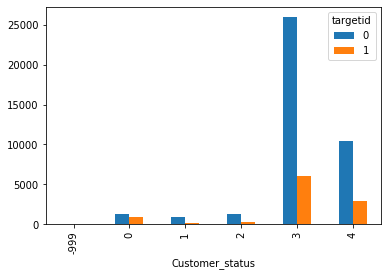

In [4]:
#checking the proportion of churn for different customer status
pd.crosstab(data['Customer_status'], data['targetid']).plot(kind='bar')
#For customer type 0, there are more people that have churned than those who haven't. Where as for status 3 & 4, 
#the ratio of churn is quite small

In [5]:
#checking the distribution of the target variable


lab = data["targetid"].value_counts().keys().tolist()
#values
val = data["targetid"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data1 = [trace]
fig = go.Figure(data = data1,layout = layout)
py.iplot(fig)


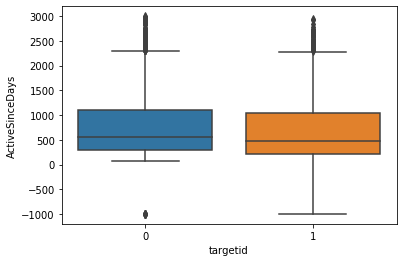

In [6]:
#cheking the distribution of the active since days for the target variable
sns.boxplot(x = data['targetid'], y=data['ActiveSinceDays'])
# It seems like there isn't much of a difference for the interquartile range for
#active days for people who have churned & who have stayed
# there are also some negative values which we would deal with later

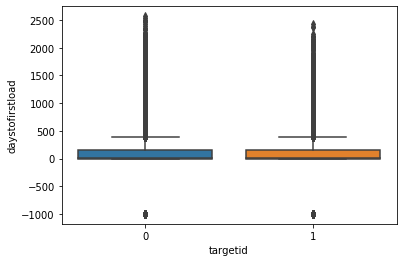

In [7]:
#cheking the distribution of the days of first load for the target variable
sns.boxplot(x = data['targetid'], y=data['daystofirstload'])

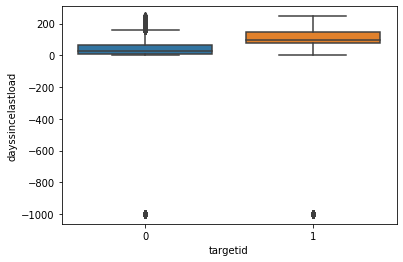

In [8]:
#cheking the distribution of the days of first load for the target variable
sns.boxplot(x = data['targetid'], y=data['dayssincelastload'])

## Feature Engineering

In [9]:
#lets examine the customer status with the targetid
pd.crosstab(data['Customer_status'], data['targetid'])

targetid,0,1
Customer_status,,
-999,10,2
0,1310,923
1,860,109
2,1246,274
3,25982,5997
4,10417,2870


In [10]:
#It seems like the customer with status 0 churn more often than any other status
#there are also some -999 values in a lot of columns. For now let's replace them by 0
data.replace(-999, 0, inplace=True)

In [11]:
# we will create a tenure column as the difference of days to first load & days since last load
data['tenure'] = data['dayssincelastload'] - data['daystofirstload']
# we will take the average of the customer status columns for on Active since days, days to first load, days since last load & tenure.
data['ActiveSinceDaysAvg_CS'] = data.groupby(['Customer_status'])['ActiveSinceDays'].transform('mean')
data['daystofirstloadAvg_CS'] = data.groupby(['Customer_status'])['daystofirstload'].transform('mean')
data['dayssincelastloadAvg_CS'] = data.groupby(['Customer_status'])['dayssincelastload'].transform('mean')
data['tenureAvg_CS'] = data.groupby(['Customer_status'])['tenure'].transform('mean')

In [12]:
# We want to capture the difference in the customer behaviour from m2 to m1 to m0. Adding 0.0001 to avoid having division by zero issues
data['%diff_OgAllRev_m2m1'] = (data['OgAllRev_m2']-data['OgAllRev_m1'])/(data['OgAllRev_m2']+0.0001)
data['%diff_OgAllRev_m1m0'] = (data['OgAllRev_m1']-data['OgAllRev_m0'])/(data['OgAllRev_m1']+0.0001)
data['%diff_InAllRev_m2m1'] = (data['InAllRev_m2']-data['InAllRev_m1'])/(data['InAllRev_m2']+0.0001)
data['%diff_InAllRev_m1m0'] = (data['InAllRev_m1']-data['InAllRev_m0'])/(data['InAllRev_m1']+0.0001)
data['%diff_avgbal_m2m1'] = (data['avgbal_m2']-data['avgbal_m1'])/(data['avgbal_m2']+0.0001)
data['%diff_avgbal_m1m0'] = (data['avgbal_m1']-data['avgbal_m0'])/(data['avgbal_m1']+0.0001)
data['%diff_billX_amt_m2m1'] = (data['billX_amt_m2']-data['billX_amt_m1'])/(data['billX_amt_m2']+0.0001)
data['%diff_billX_amt_m1m0'] = (data['billX_amt_m1']-data['billX_amt_m0'])/(data['billX_amt_m1']+0.0001)
data['%diff_rechtxn_m2m1'] = (data['rechtxn_dayscnt_m2']-data['rechtxn_dayscnt_m1'])/(data['rechtxn_dayscnt_m2']+0.0001)
data['%diff_rechtxn_m1m0'] = (data['rechtxn_dayscnt_m1']-data['rechtxn_dayscnt_m0'])/(data['rechtxn_dayscnt_m1']+0.0001)
data['%diff_tot_rechX_m2m1'] = (data['tot_rechX_m2']-data['tot_rechX_m1'])/(data['tot_rechX_m2']+0.0001)
data['%diff_tot_rechX_m1m0'] = (data['tot_rechX_m1']-data['tot_rechX_m0'])/(data['tot_rechX_m1']+0.0001)

In [13]:
missing_df = pd.DataFrame()
missing_df['cols'] = data.isnull().sum().keys()
missing_df['values'] = data.isnull().sum().values.tolist()
missing_df[missing_df['values']>0]

,cols,values
45,r_avg_max_rtlX_m0,10888
46,r_avg_max_rtlX_m1,12423
47,r_avg_max_rtlX_m2,12651
69,r_avg_max_rechX_m0,6878
70,r_avg_max_rechX_m1,11727
71,r_avg_max_rechX_m2,14083


In [14]:
data.head(1)

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,tot_RevUo_m0,tot_RevUo_m1,tot_RevUo_m2,r_tot_RevUo_m0_m1,r_tot_RevUo_m1_m2,r_tot_RevUo_m0_m12,avg_RevUo_m0,avg_RevUo_m1,avg_RevUo_m2,chg_RevUo_l0_1m,chg_RevUo_l1_2m,chg_RevUo_l2_3m,tot_LdCnt_m0,tot_LdCnt_m1,tot_LdCnt_m2,max_RevUo_m0,max_RevUo_m1,max_RevUo_m2,r_avg_RevUo_m0_m1,r_avg_RevUo_m1_m2,avgdays_btw_loads_l6,tot_failed_LdTxnCnt_3m,r_failed_LdTxnCnt_m0_m12,tot_rtlX_m0,tot_rtlX_m1,tot_rtlX_m2,r_tot_rtlX_m0_m1,r_tot_rtlX_m1_m2,r_tot_rtlX_m0_m12,avg_rtlX_m0,avg_rtlX_m1,avg_rtlX_m2,max_rtlX_m0,max_rtlX_m1,max_rtlX_m2,r_avg_max_rtlX_m0,r_avg_max_rtlX_m1,r_avg_max_rtlX_m2,RtlTxns_cnt_m0,RtlTxns_cnt_m1,RtlTxns_cnt_m2,r_RtlTxns_cnt_m0_m1,r_RtlTxns_cnt_m1_m2,sum_r_RtlTxns_cnt,fail_RtlTxncnt_m0,RtlTxn_dayscnt_m0,RtlTxn_dayscnt_m1,RtlTxn_dayscnt_m2,tot_rechX_m0,tot_rechX_m1,tot_rechX_m2,chg_rechX_l0_1m,chg_rechX_l1_2m,avg_rechX_m0,avg_rechX_m1,avg_rechX_m2,max_rechX_m0,max_rechX_m1,max_rechX_m2,r_avg_max_rechX_m0,r_avg_max_rechX_m1,r_avg_max_rechX_m2,rechtxns_cnt_m0,rechtxns_cnt_m1,rechtxns_cnt_m2,rechtxn_dayscnt_m0,rechtxn_dayscnt_m1,rechtxn_dayscnt_m2,billX_amt_m0,billX_amt_m1,billX_amt_m2,tot_billX_amt_m012,r_billX_amt_m0_m1,r_billX_amt_m0_m12,r_billX_amt_m1_m2,billX_cnt_m0,billX_cnt_m1,billX_cnt_m2,rech_amt_m0,rech_amt_m1,rech_amt_m2,r_rech_amt_m0_m1,r_rech_amt_m1_m2,sum_r_rech_amt_m1m2_m0m1,r_rech_amt_m0_m12,avgbal_m0,avgbal_m1,avgbal_m2,resolved_cnt_m2,tot_resolved_cnt_m012,percent_resolved_3m,InAllRev_m0,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid,tenure,ActiveSinceDaysAvg_CS,daystofirstloadAvg_CS,dayssincelastloadAvg_CS,tenureAvg_CS,%diff_OgAllRev_m2m1,%diff_OgAllRev_m1m0,%diff_InAllRev_m2m1,%diff_InAllRev_m1m0,%diff_avgbal_m2m1,%diff_avgbal_m1m0,%diff_billX_amt_m2m1,%diff_billX_amt_m1m0,%diff_rechtxn_m2m1,%diff_rechtxn_m1m0,%diff_tot_rechX_m2m1,%diff_tot_rechX_m1m0
0,1,1,4,221,1,2,50.0,33.333333,0,153,0.0,0.0,497.0,0.0,0.0,0.0,0.0,0.0,497.0,0.0,-100.0,-83.926261,0,0,1,0.0,0.0,497.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,199,150,485,32.666667,-69.072165,199.0,150.0,485.0,199,150,485,1.0,1.0,1.0,1,1,1,1,1,1,0,0,0,0,0.0,0.0,0.0,0,0,0,199,150,485,131.788079,30.864198,162.652277,62.578616,0.0,12.580645,12.535714,0,0,0.0,0.0,0.0,497.0,0.0,0.0,497.0,199.0,150.0,485.0,834.0,0,153,656.845187,142.40009,58.434786,-83.965304,0.690722,-0.326666,1.0,0.0,-0.003584,0.999992,0.0,0.0,0.0,0.0,0.690722,-0.326666


In [15]:
# We don't want to pass the ID cols and the target column to the robust scaler
data1 = data.drop(['userID', 'Contact_ind', 'targetid'], axis=1)

In [16]:
# The values in the columns are in different ranges, and some columns have outliers. We will use the Robust Scaler,
#because it works with the Interquartile range and does not get influenced by the presence of outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(data1)

In [17]:
scaled = pd.DataFrame(scaled, columns=data1.columns)

In [18]:
# Lets fill in the values of the missing values using the mean
#Since we have used the robust scaler
scaled.fillna(scaled.mean(), inplace=True)

In [19]:
scaled.head()

,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,tot_RevUo_m0,tot_RevUo_m1,tot_RevUo_m2,r_tot_RevUo_m0_m1,r_tot_RevUo_m1_m2,r_tot_RevUo_m0_m12,avg_RevUo_m0,avg_RevUo_m1,avg_RevUo_m2,chg_RevUo_l0_1m,chg_RevUo_l1_2m,chg_RevUo_l2_3m,tot_LdCnt_m0,tot_LdCnt_m1,tot_LdCnt_m2,max_RevUo_m0,max_RevUo_m1,max_RevUo_m2,r_avg_RevUo_m0_m1,r_avg_RevUo_m1_m2,avgdays_btw_loads_l6,tot_failed_LdTxnCnt_3m,r_failed_LdTxnCnt_m0_m12,tot_rtlX_m0,tot_rtlX_m1,tot_rtlX_m2,r_tot_rtlX_m0_m1,r_tot_rtlX_m1_m2,r_tot_rtlX_m0_m12,avg_rtlX_m0,avg_rtlX_m1,avg_rtlX_m2,max_rtlX_m0,max_rtlX_m1,max_rtlX_m2,r_avg_max_rtlX_m0,r_avg_max_rtlX_m1,r_avg_max_rtlX_m2,RtlTxns_cnt_m0,RtlTxns_cnt_m1,RtlTxns_cnt_m2,r_RtlTxns_cnt_m0_m1,r_RtlTxns_cnt_m1_m2,sum_r_RtlTxns_cnt,fail_RtlTxncnt_m0,RtlTxn_dayscnt_m0,RtlTxn_dayscnt_m1,RtlTxn_dayscnt_m2,tot_rechX_m0,tot_rechX_m1,tot_rechX_m2,chg_rechX_l0_1m,chg_rechX_l1_2m,avg_rechX_m0,avg_rechX_m1,avg_rechX_m2,max_rechX_m0,max_rechX_m1,max_rechX_m2,r_avg_max_rechX_m0,r_avg_max_rechX_m1,r_avg_max_rechX_m2,rechtxns_cnt_m0,rechtxns_cnt_m1,rechtxns_cnt_m2,rechtxn_dayscnt_m0,rechtxn_dayscnt_m1,rechtxn_dayscnt_m2,billX_amt_m0,billX_amt_m1,billX_amt_m2,tot_billX_amt_m012,r_billX_amt_m0_m1,r_billX_amt_m0_m12,r_billX_amt_m1_m2,billX_cnt_m0,billX_cnt_m1,billX_cnt_m2,rech_amt_m0,rech_amt_m1,rech_amt_m2,r_rech_amt_m0_m1,r_rech_amt_m1_m2,sum_r_rech_amt_m1m2_m0m1,r_rech_amt_m0_m12,avgbal_m0,avgbal_m1,avgbal_m2,resolved_cnt_m2,tot_resolved_cnt_m012,percent_resolved_3m,InAllRev_m0,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,tenure,ActiveSinceDaysAvg_CS,daystofirstloadAvg_CS,dayssincelastloadAvg_CS,tenureAvg_CS,%diff_OgAllRev_m2m1,%diff_OgAllRev_m1m0,%diff_InAllRev_m2m1,%diff_InAllRev_m1m0,%diff_avgbal_m2m1,%diff_avgbal_m1m0,%diff_billX_amt_m2m1,%diff_billX_amt_m1m0,%diff_rechtxn_m2m1,%diff_rechtxn_m1m0,%diff_tot_rechX_m2m1,%diff_tot_rechX_m1m0
0,1.0,-0.402439,-0.50,-0.25,-0.500000,-0.696296,-0.019231,1.341176,-0.152672,-0.166667,0.075484,-0.146879,-0.132098,-0.178380,-0.198931,-0.210376,0.480188,0.000000,-1.073681,-1.005231,-0.5,-0.5,0.000000,-0.160,-0.200,0.212,-0.248397,-0.232888,0.0,-0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.00000,0.0,0.0,0.0,0.0,-0.161692,-0.178998,0.402542,0.534356,-1.260410,0.220968,0.165091,1.671729,0.000000,-0.114219,0.902256,0.560908,0.644496,0.628422,-0.5,-0.25,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.045872,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.167391,0.107143,1.125313,0.254650,-0.049266,-0.013751,0.021158,-0.127113,-0.082974,-0.060475,0.0,0.0,0.0,-0.155307,-0.187500,0.052059,-0.163380,-0.142717,-0.210919,-0.258398,-0.265418,-0.063182,-0.264417,0.873494,-1.0,-1.0,1.0,1.0,0.187191,-8.069565e-02,0.410364,0.000000e+00,-0.002194,0.867738,0.000000e+00,0.000,0.000000,0.000000,0.253767,-1.350940e-01
1,1.0,0.821951,0.00,-0.50,0.785714,-0.066667,-0.019231,-0.294118,0.354962,-0.003333,-0.022581,1.205422,0.159617,1.347535,0.352800,0.181624,-0.034763,2.829592,-0.311212,-0.614103,0.5,0.0,0.333333,0.290,0.045,-0.086,0.506834,0.474576,0.0,-0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.00000,0.0,0.0,0.0,0.0,0.634328,-0.065632,0.204802,3.965941,-0.528920,0.481183,0.065091,0.380407,0.581395,0.037296,0.185464,-0.091743,-0.034141,0.418271,0.5,0.00,0.333333,1.0,0.000000,0.333333,0.741379,0.731293,0.000000,0.348624,1.127650,2.295900,216.352201,1.0,1.0,0.0,1.091304,-0.144958,0.774436,6.681793,-0.115587,0.134705,1.371214,-0.100483,-0.122307,-0.103907,0.0,0.0,0.0,0.288027,-0.034375,-0.035863,1.161735,0.700891,-0.080832,0.043062,-0.222019,-0.126818,-0.184433,0.036145,-1.0,-1.0,1.0,1.0,0.078553,-6.871783e-01,0.118946,-1.029263e+0

In [20]:
# we want to remove correlated columns to improve the model performance and also for dimensionality reduction
corr_matrix = scaled.corr().abs()
#select the upper triangle of the corr matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.75)]

In [21]:
to_drop

['r_AcD_m0_m123',
 'max_RevUo_m0',
 'max_RevUo_m1',
 'max_RevUo_m2',
 'r_tot_rtlX_m0_m12',
 'max_rtlX_m0',
 'max_rtlX_m1',
 'max_rtlX_m2',
 'sum_r_RtlTxns_cnt',
 'RtlTxn_dayscnt_m1',
 'tot_rechX_m1',
 'tot_rechX_m2',
 'max_rechX_m2',
 'rechtxns_cnt_m1',
 'rechtxns_cnt_m2',
 'billX_amt_m0',
 'billX_amt_m1',
 'billX_amt_m2',
 'tot_billX_amt_m012',
 'r_billX_amt_m0_m12',
 'billX_cnt_m0',
 'billX_cnt_m1',
 'billX_cnt_m2',
 'sum_r_rech_amt_m1m2_m0m1',
 'InAllRev_m0',
 'InAllRev_m1',
 'InAllRev_m2',
 'r_InAllRev_m0_m1',
 'tot_InAllRev_3m',
 'OgAllRev_m0',
 'OgAllRev_m1',
 'OgAllRev_m2',
 'tot_OgAllRev_3m',
 'tenure',
 'tenureAvg_CS',
 '%diff_InAllRev_m2m1',
 '%diff_InAllRev_m1m0',
 '%diff_billX_amt_m2m1',
 '%diff_billX_amt_m1m0']

In [22]:
# some of the engineered features are in to_drop, but we will remove them for now
scaled = scaled.drop(to_drop, axis=1)

In [23]:
Id_col = data['userID']
contact_id = data['Contact_ind']
target = data['targetid']
#scaled = scaled.drop(['userID', 'Contact_ind', 'targetid'], axis=1)

In [24]:
scaled['targetid'] = data['targetid']
target_col = ["targetid"]

## Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score


#splitting train and test
train, test = train_test_split(scaled, test_size=0.2, random_state=17)
train_X = train.drop('targetid', axis=1)
train_Y = train['targetid']
test_X = test.drop('targetid', axis=1)
test_Y = test['targetid']

In [26]:
import yellowbrick
from yellowbrick.classifier import DiscriminationThreshold

In [27]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization



cols = [column for column in train_X.columns]
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [28]:
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                          verbose=1, warm_start=False)

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      7945
           1       0.39      0.07      0.11      2055

    accuracy                           0.79     10000
   macro avg       0.59      0.52      0.50     10000
weighted avg       0.72      0.79      0.72     10000

Accuracy   Score :  0.7866
Area under curve :  0.5193791256494238 



C:\Users\lenovo\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

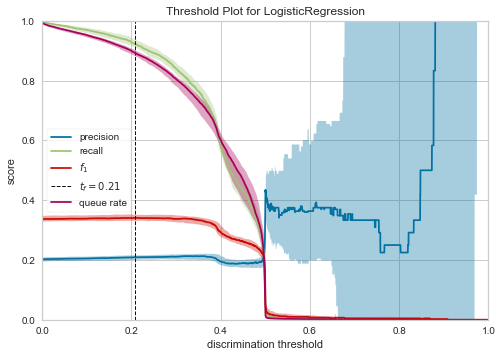

In [29]:
telecom_churn_prediction(logit, train_X, test_X, train_Y, test_Y,cols, "coefficients", threshold_plot=True)

In [30]:
# Since we have a class imbalance problem, we would use the SMOTE function for minority over sampling
from imblearn.over_sampling import SMOTE

smote_X = scaled.drop('targetid', axis=1)
smote_Y = scaled['targetid']

smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

os = SMOTE(random_state=0)
os_smote_X, os_smote_Y = os.fit_sample(smote_train_X, smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

Using TensorFlow backend.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      7945
           1       0.33      0.58      0.42      2055

    accuracy                           0.67     10000
   macro avg       0.60      0.64      0.60     10000
weighted avg       0.76      0.67      0.70     10000

Accuracy   Score :  0.6739
Area under curve :  0.6403744416831654 



C:\Users\lenovo\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



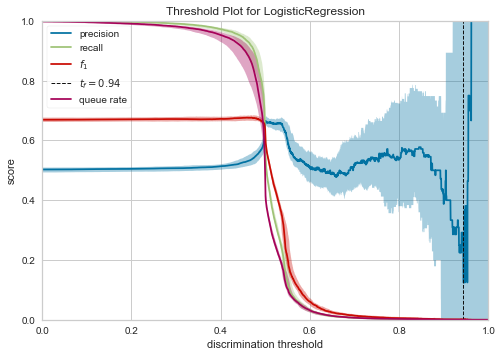

In [31]:
logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)
telecom_churn_prediction(logit_smote, os_smote_X, test_X, os_smote_Y, test_Y, cols, "coefficients", threshold_plot=True)

The AUC has improved considerably after the minority oversampling

In [32]:
## Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose, 
#either the best or worst performing feature
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
from sklearn.feature_selection import RFE

In [33]:
rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X, os_smote_Y)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [34]:
#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                       "ranking": rfe.ranking_})
#cols = idc_rfe[idc_rfe["rfe_support"]==True]["columns"].tolist()

In [35]:
idc_rfe['columns'] = cols

In [36]:
#taking the significant columns based on rfe
sig_cols = idc_rfe[idc_rfe["rfe_support"]==True]["columns"].tolist()

In [37]:
#taking the columns from smote
train_rf_X = os_smote_X[sig_cols]
train_rf_Y = os_smote_Y
test_rf_X = test[sig_cols]
test_rf_Y = test[target_col]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.77      0.85      7945
           1       0.48      0.82      0.61      2055

    accuracy                           0.78     10000
   macro avg       0.71      0.79      0.73     10000
weighted avg       0.85      0.78      0.80     10000

Accuracy   Score :  0.7826
Area under curve :  0.7948217596952283 



C:\Users\lenovo\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



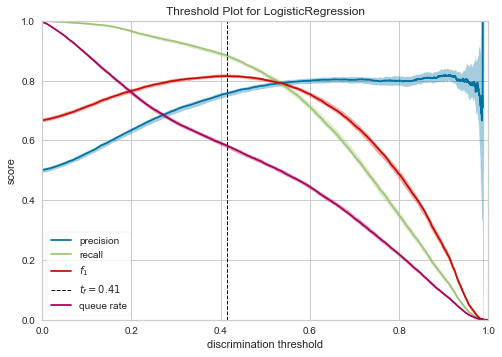

In [38]:
logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

## Using KNN classifier

In [39]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
                          n_jobs=-1, n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.72      0.82      7945
           1       0.43      0.80      0.56      2055

    accuracy                           0.74     10000
   macro avg       0.68      0.76      0.69     10000
weighted avg       0.83      0.74      0.76     10000

Accuracy Score   :  0.7397
Area under curve :  0.7634946155059341


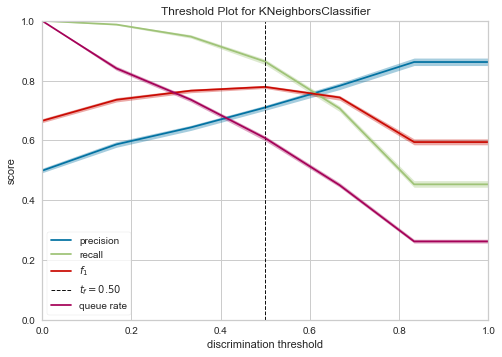

In [41]:
telecom_churn_prediction_alg(knn,os_smote_X, test_X, os_smote_Y, test_Y, threshold_plot=True)

In [42]:
smote_cols = [col for col in os_smote_X.columns]

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      7945
           1       0.45      0.79      0.58      2055

    accuracy                           0.76     10000
   macro avg       0.69      0.77      0.70     10000
weighted avg       0.84      0.76      0.78     10000

Accuracy   Score :  0.7605
Area under curve :  0.7731574587454196 



C:\Users\lenovo\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



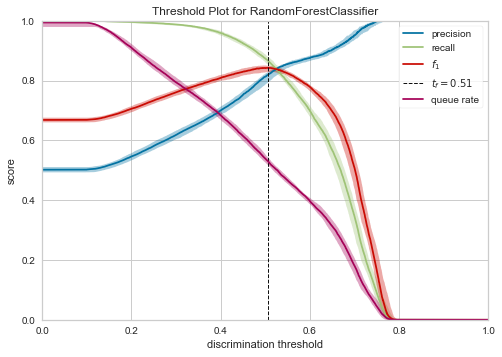

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

def plot_tree_randomforest(columns, nf_estimators, estimated_tree, maximum_depth,criterion_type, model_performance=None):
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(os_smote_X, os_smote_Y)
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance== True:
        telecom_churn_prediction(rfc, os_smote_X, test_X, os_smote_Y, test_Y,smote_cols,"features", threshold_plot=True)
plot_tree_randomforest(smote_cols,100,99,3,"entropy",True)

## XGBoost with hyperopt

In [46]:
## Hyperopt is a library which allows to take advantage of the Bayesian optimization techniques and is faster than Grid Search

In [49]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

SEED = 314159265
VALID_SIZE = 0.2
TARGET = 'outcome'

In [50]:
#utility function
def intersect(l_1, l_2):
    return list(set(l_1) & set(l_2))

In [51]:
def score(params):
    print("Training with params: ")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(os_smote_X, label=os_smote_Y)
    dvalid = xgb.DMatrix(test_X, label=test_Y)
    watchlist = [(dvalid,'eval'),(dtrain,'train')]
    gbm_model = xgb.train(params, dtrain, num_round,
                         evals=watchlist,
                         verbose_eval=True)
    predictions = gbm_model.predict(dvalid, ntree_limit=gbm_model.best_iteration+1)
    score = roc_auc_score(test_Y, predictions)
    print("\tScore {0}\n\n".format(score))
    loss = 1 - score
    return predictions, score, loss

In [56]:
best_params = {'n_estimators': 850,
              'colsample_bytree': 0.5,
              'eta': 0.05,
              'max_depth': 12,
              'min_child_weight': 1.0,
              'subsample': 0.7000000000000001}
preds, aucscore, loss = score(best_params)

Training with params: 
{'n_estimators': 850, 'colsample_bytree': 0.5, 'eta': 0.05, 'max_depth': 12, 'min_child_weight': 1.0, 'subsample': 0.7000000000000001}
[0]	eval-rmse:0.483838	train-rmse:0.481551
[1]	eval-rmse:0.469081	train-rmse:0.464514
[2]	eval-rmse:0.455158	train-rmse:0.448256
[3]	eval-rmse:0.445912	train-rmse:0.435648
[4]	eval-rmse:0.433347	train-rmse:0.420839
[5]	eval-rmse:0.421239	train-rmse:0.406791
[6]	eval-rmse:0.413603	train-rmse:0.396238
[7]	eval-rmse:0.406195	train-rmse:0.38585
[8]	eval-rmse:0.395938	train-rmse:0.373892
[9]	eval-rmse:0.389425	train-rmse:0.364686
[10]	eval-rmse:0.379948	train-rmse:0.35353
[11]	eval-rmse:0.374274	train-rmse:0.3455
[12]	eval-rmse:0.365596	train-rmse:0.335325
[13]	eval-rmse:0.357751	train-rmse:0.325911
[14]	eval-rmse:0.353039	train-rmse:0.319108
[15]	eval-rmse:0.348426	train-rmse:0.312387
[16]	eval-rmse:0.343858	train-rmse:0.305846
[17]	eval-rmse:0.337303	train-rmse:0.29791
[18]	eval-rmse:0.333383	train-rmse:0.292189
[19]	eval-rmse:0.3300

In [57]:
#Since the class imbalance was handled using Smote, we can look at the Area Under the Curve
aucscore

0.9912913751628825